## Notebook 02: Exploratory Data Analysis (EDA)

### Objective
In this notebook, we will delve deeper into the cleaned `Food_Delivery_Times.csv` dataset by performing Exploratory Data Analysis (EDA). Our objectives include:

- **Data Distribution:** Analyzing the distribution of key variables (e.g., delivery time, order value, distance).
- **Relationships Between Variables:** Identifying correlations and dependencies between different features.
- **Patterns and Anomalies:** Discovering trends, seasonality, outliers, and other interesting patterns in the data.
- **Data Visualization:** Creating various plots and charts to visually represent the data characteristics and insights.

### Problem Context
Building upon the cleaned dataset from `Notebook 01`, this phase aims to gain a comprehensive understanding of the factors influencing food delivery times. The insights derived from this EDA will be crucial for feature engineering, model selection, and ultimately, improving the efficiency and accuracy of delivery time predictions in subsequent stages of the project.

### Step 1: Load Required Libraries
We import libraries required for EDA


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Matplotlib style
plt.style.use('seaborn-v0_8-darkgrid')

# Seaborn settings
sns.set_palette("husl")
sns.set_context("notebook")

# Seaborn settings
sns.set_palette("husl")
sns.set_context("notebook")

# Figure resolution
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

# Font sizes (readability)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows",100)

print("EDA environment and libraries set up")

EDA environment and libraries set up


## Step 2: Load the Datasets

In this step, we load the raw dataset from the `data/processed' directory.
These datasets will be used throughout the project


In [8]:
df=pd.read_csv("clean_food_delivery_times.csv")
print("Data loaded")

Data loaded


In [9]:
# Get a concise summary of the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [10]:
# Generate descriptive statistics of the numerical columns
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.870301,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,4.579381,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


### Step 3: Visualize Numerical Variable Distributions

Let's start by visualizing the distribution of our numerical features using histograms to understand their spread, central tendency, and identify any potential outliers or interesting patterns.

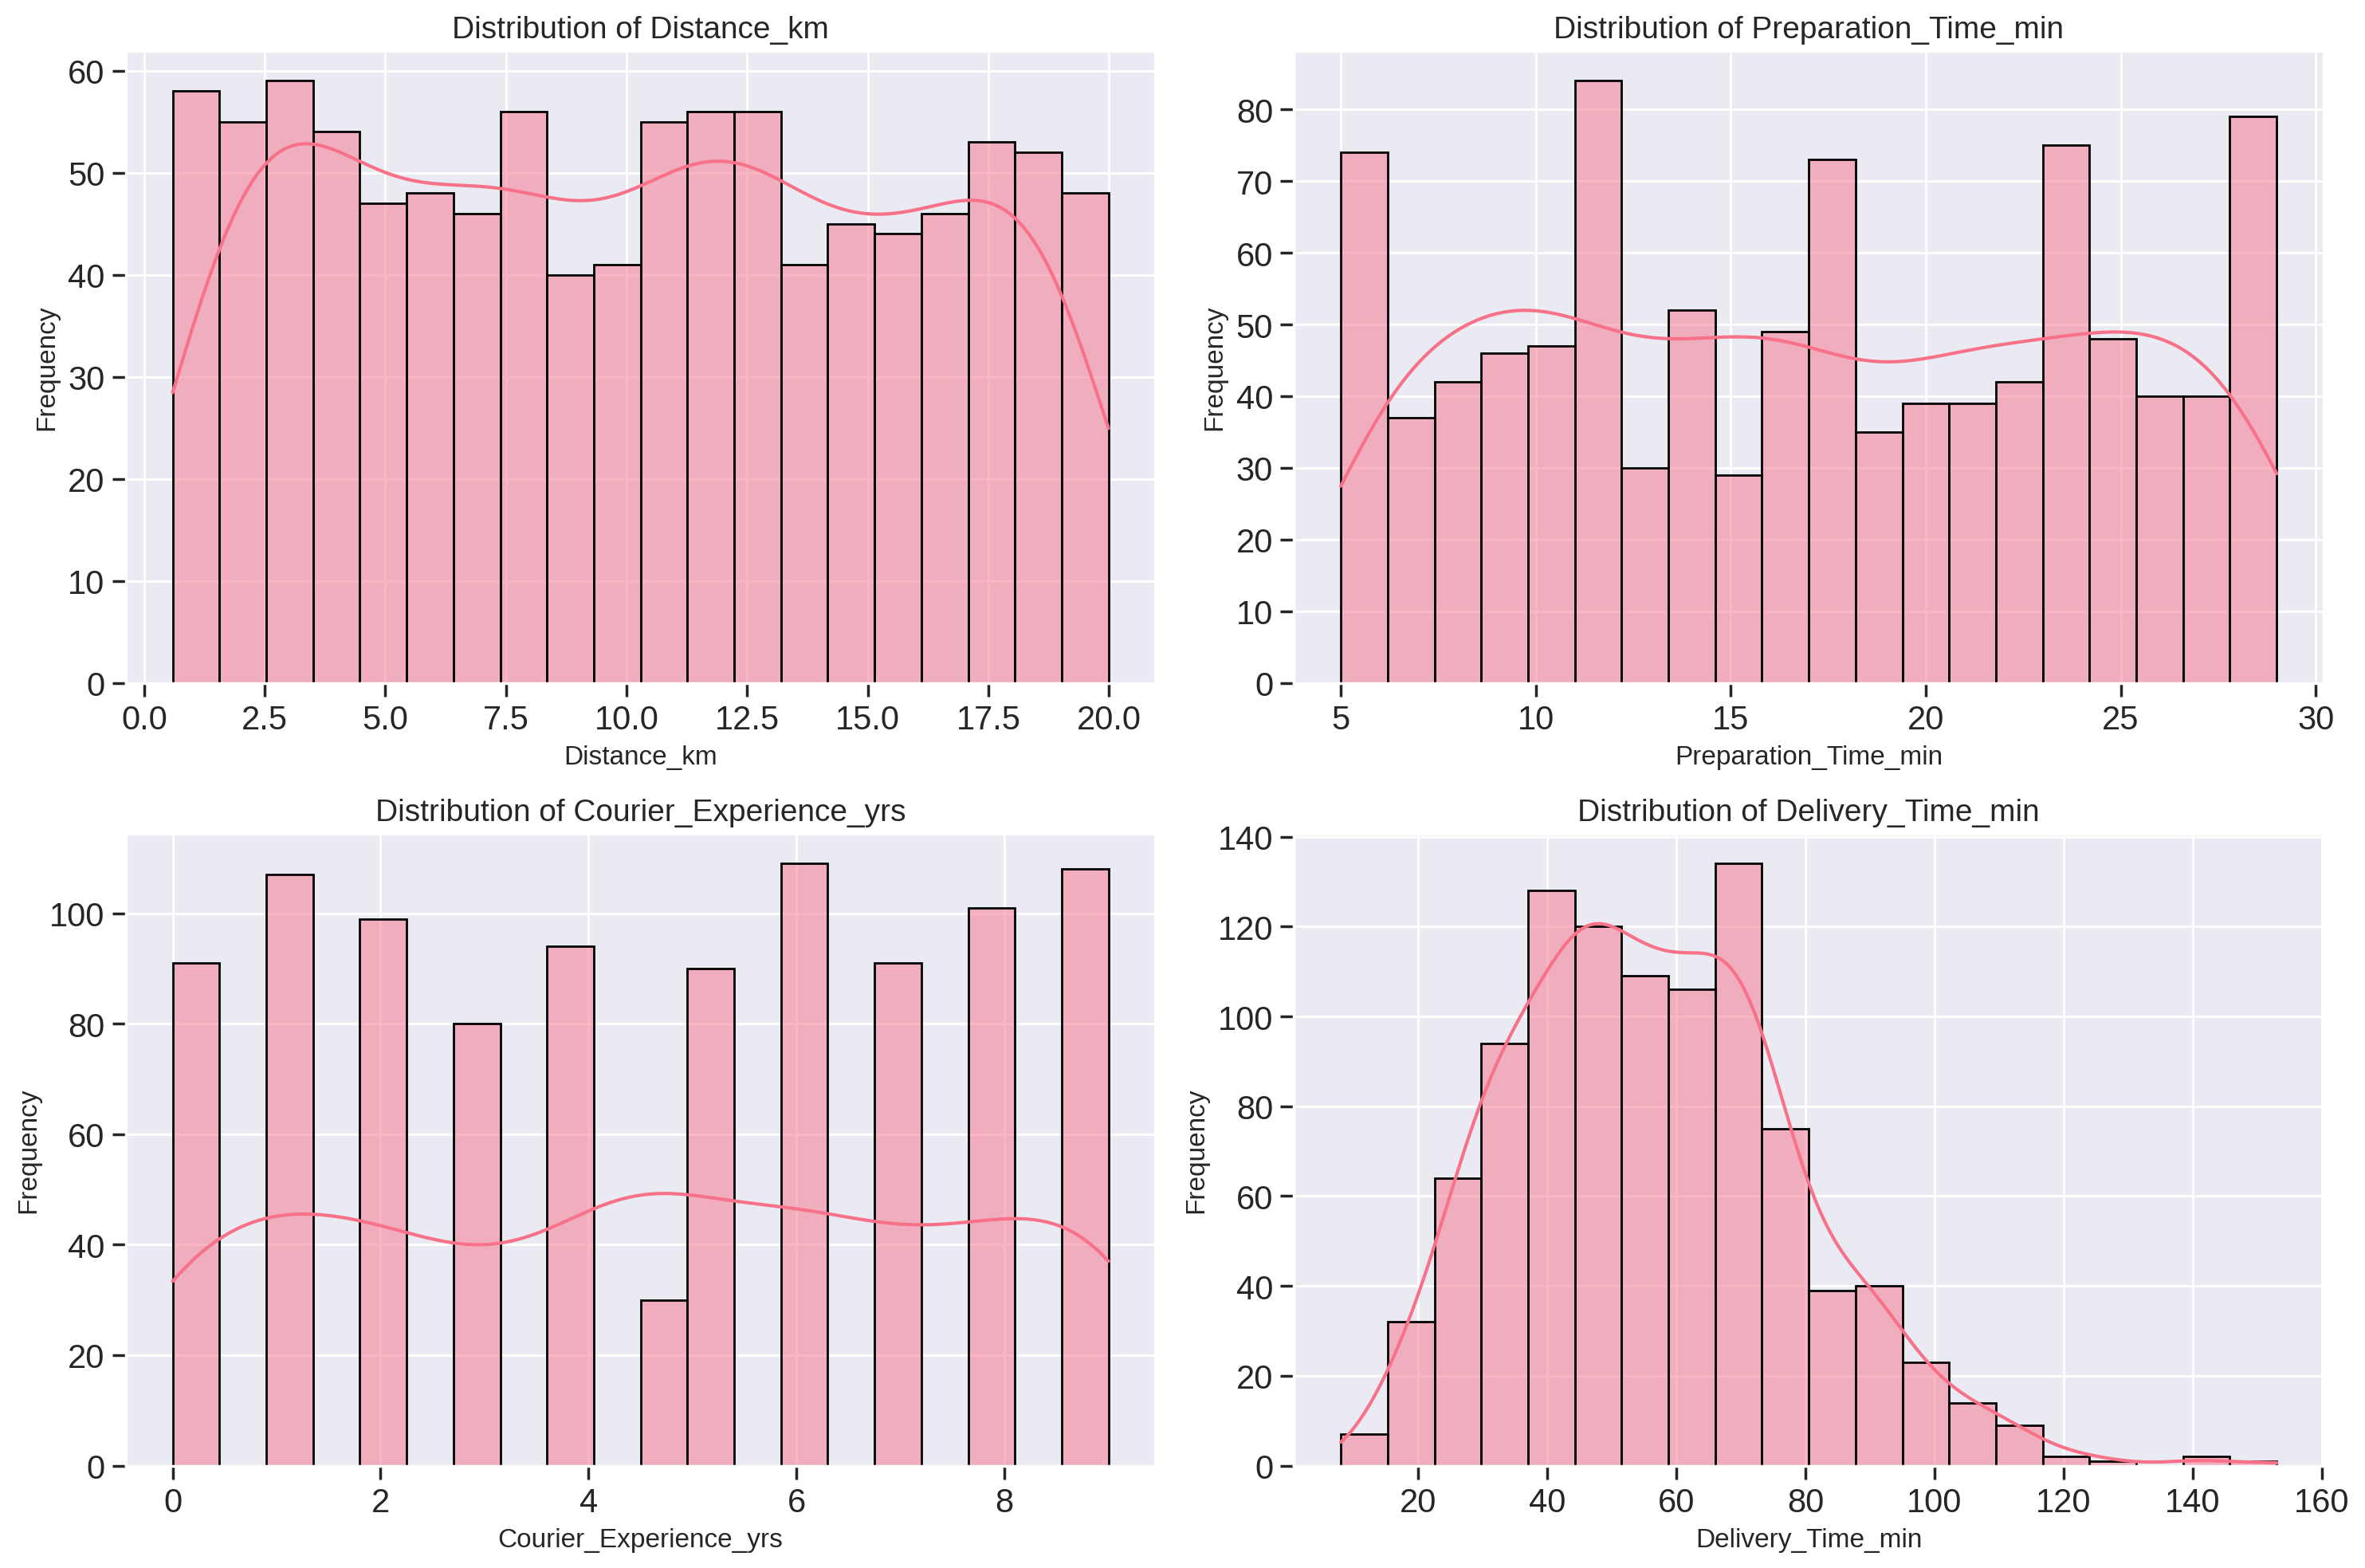

In [31]:
numerical_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']

# plt.figure(figsize=(15, 10))
# for i, feature in enumerate(numerical_features):
#     plt.subplot(2, 2, i + 1) # Create a 2x2 grid of subplots
#     sns.histplot(df[feature], kde=True, bins=20)
#     plt.title(f'Distribution of {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(15, 10))
for i,feature in enumerate(numerical_features):
  plt.subplot(2,2,i+1)
  sns.histplot(df[feature],kde=True,bins=20)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Observations from Numerical Variable Distributions

Based on the histograms generated and `df.describe()` output:

- **Distance_km:** The distribution appears fairly uniform, indicating that delivery distances are spread relatively evenly between the minimum (0.59 km) and maximum (19.99 km). There doesn't seem to be a strong concentration at any particular distance range.
- **Preparation_Time_min:** This also shows a relatively uniform distribution, with preparation times ranging from 5 to 29 minutes. This suggests that orders have a varied preparation time, with no specific time being significantly more common.
- **Courier_Experience_yrs:** The histogram for courier experience also looks quite uniform, ranging from 0 to 9 years. This implies a diverse pool of couriers with varying levels of experience, without a strong bias towards very new or very experienced individuals.
- **Delivery_Time_min:** The distribution of `Delivery_Time_min` seems to be slightly right-skewed, meaning there are more deliveries at the lower end of the time scale, but also a tail of longer delivery times, extending up to 153 minutes. The bulk of deliveries are around the mean of 56.7 minutes, but some take considerably longer, which might indicate potential outliers or specific scenarios causing delays.

### Step 4: Visualize Categorical Variable Distributions

Let's examine the distribution of our categorical features to understand their composition and identify any dominant categories.

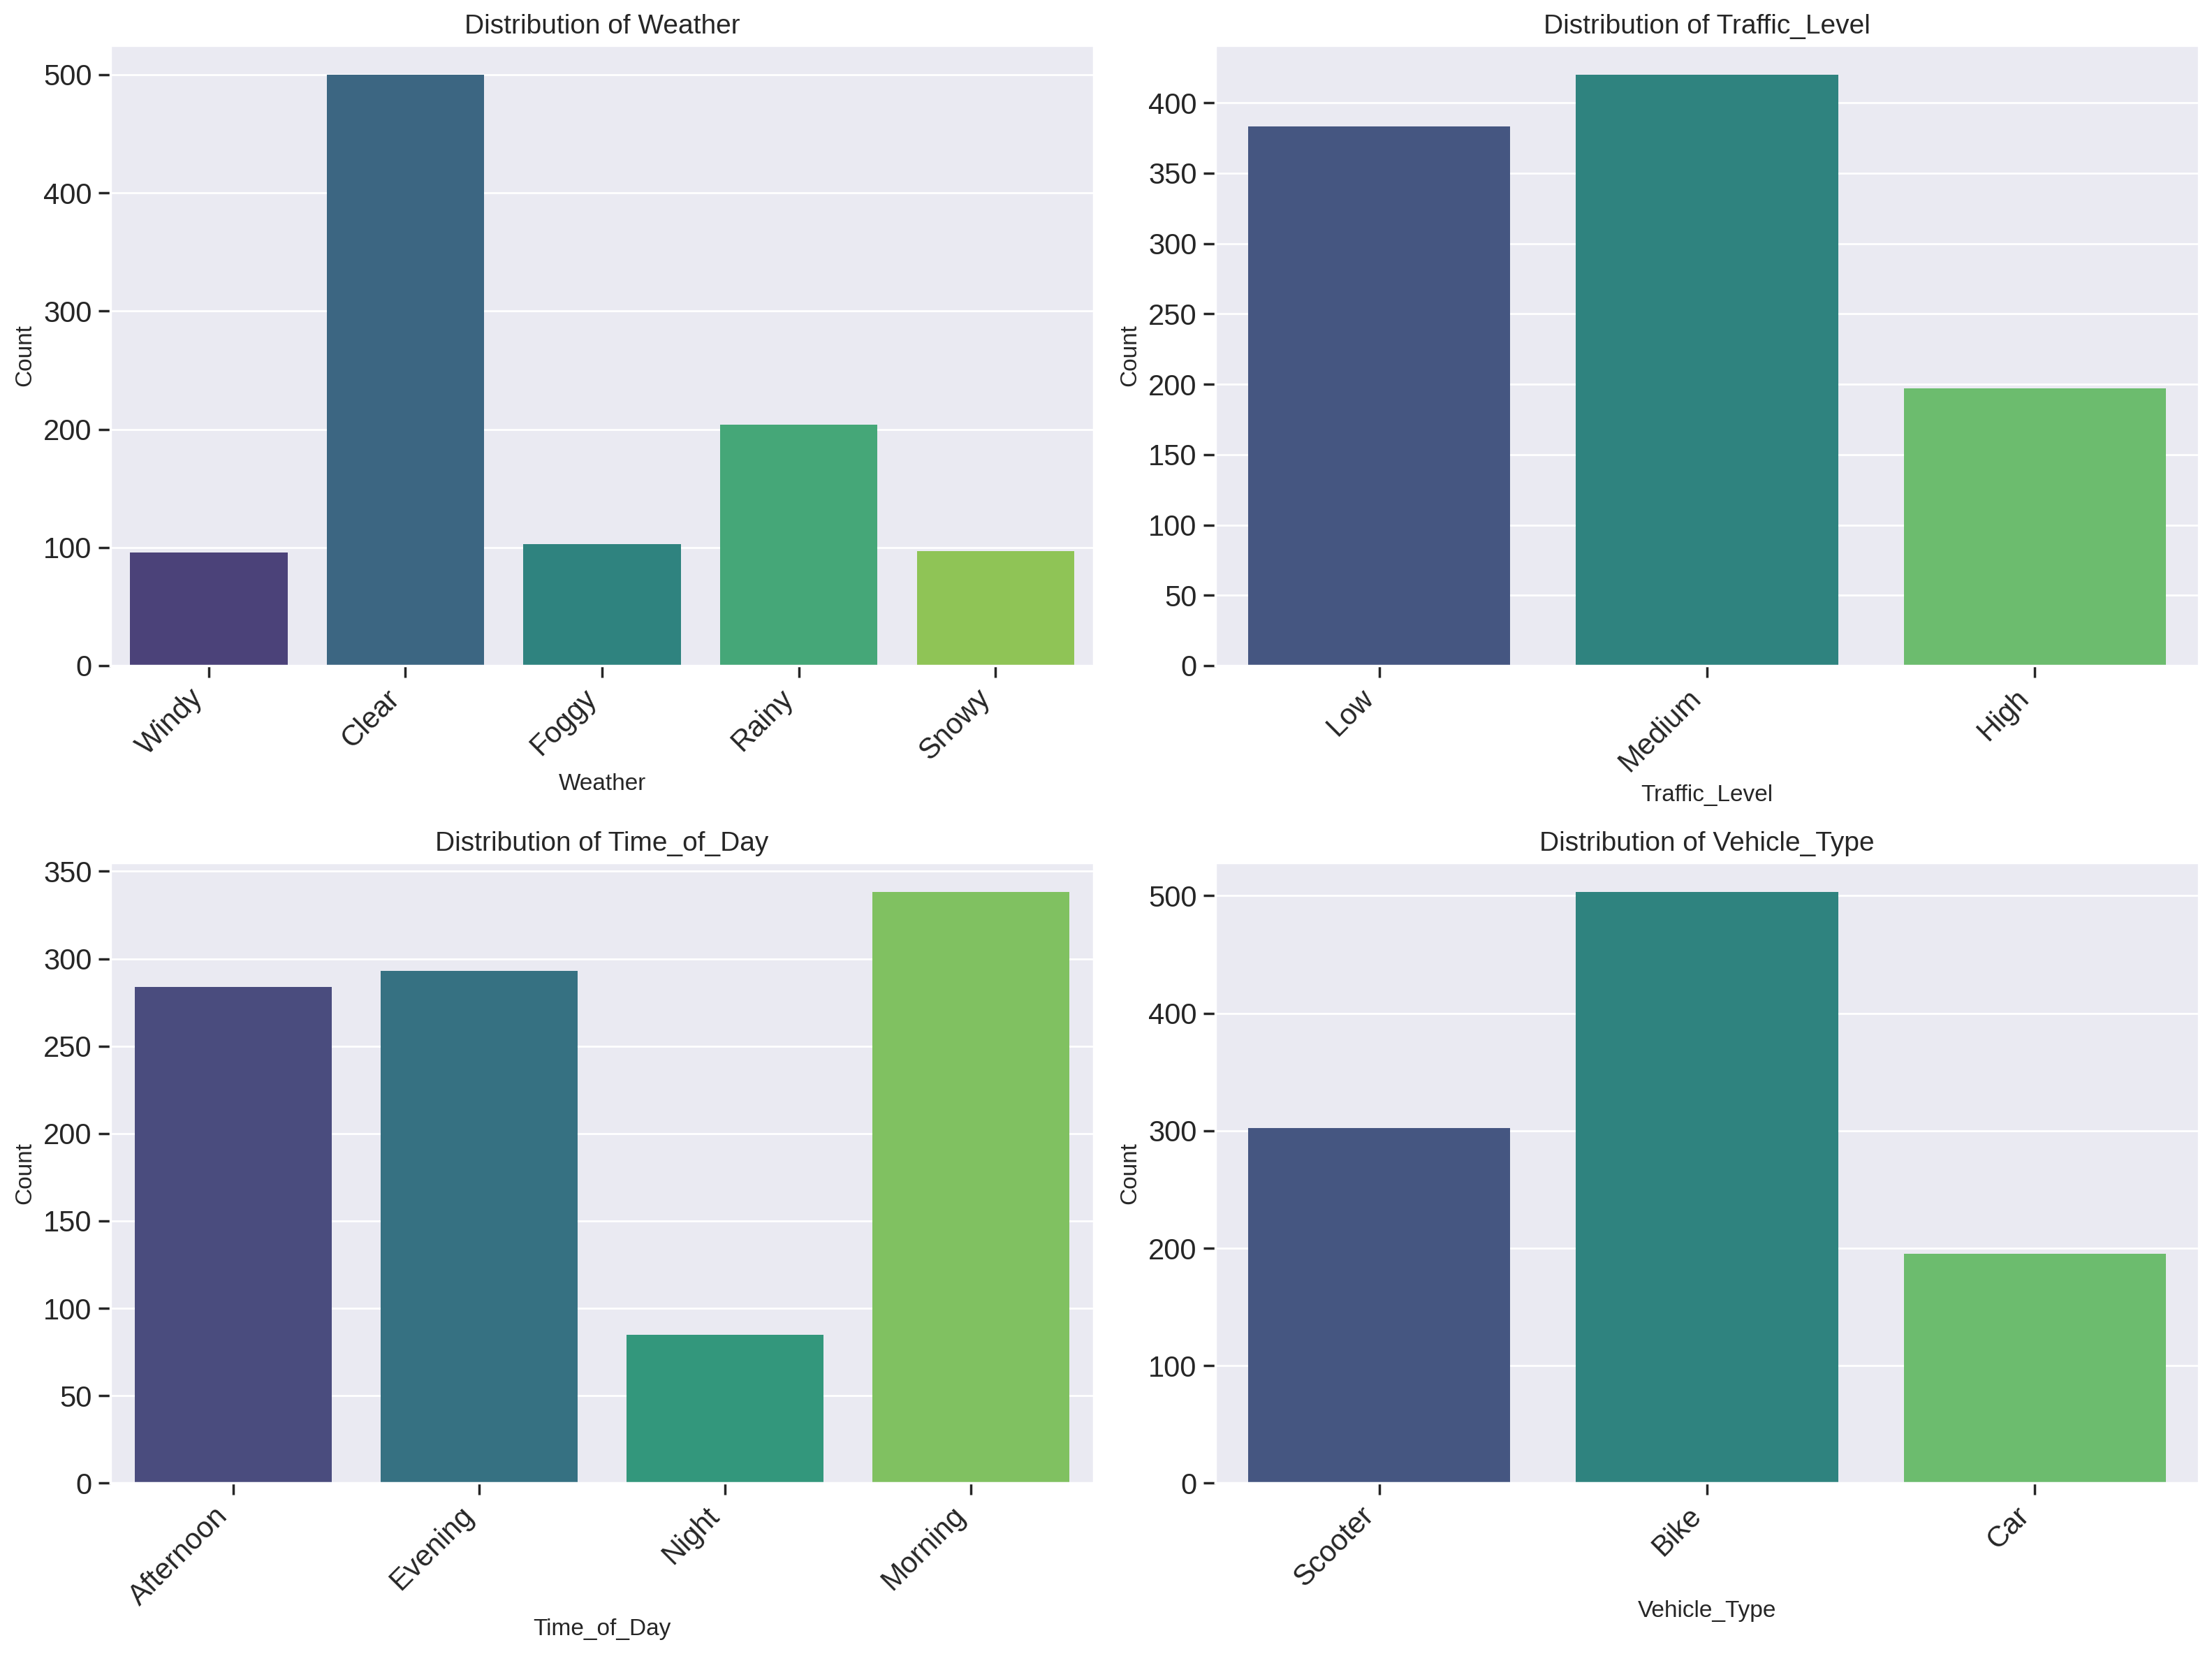

In [34]:
categorical_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1) # Create a 2x2 grid of subplots
    sns.countplot(data=df, x=feature, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Observations from Categorical Variable Distributions

Based on the count plots generated:

-   **Weather:** We likely see 'Clear' weather as the most frequent category, as it generally doesn't impede delivery. 'Rainy', 'Foggy', and 'Windy' conditions are also present, indicating diverse operational environments. Understanding the frequency of these conditions is crucial, as adverse weather can significantly impact delivery times.
-   **Traffic_Level:** 'Medium' and 'Low' traffic levels probably represent the majority of deliveries. 'High' traffic, while less frequent, is an important factor to consider for predicting longer delivery times and potential delays, especially during peak hours.
-   **Time_of_Day:** 'Afternoon' and 'Evening' are typically peak times for food delivery, so these categories are expected to show the highest counts. 'Morning' and 'Night' deliveries are usually less frequent but still contribute to the overall delivery demand.
-   **Vehicle_Type:** 'Scooter' and 'Bike' are often the most common vehicle types for food delivery, particularly in urban areas due to their efficiency. 'Car' might be used for longer distances or larger orders, and its frequency will depend on the geographical area and operational setup.

### Step 5: Explore Relationships between Categorical Features and Delivery Time

Now, let's visualize how our categorical features influence the `Delivery_Time_min` using box plots. This will help us identify which categories are associated with longer or shorter delivery durations.

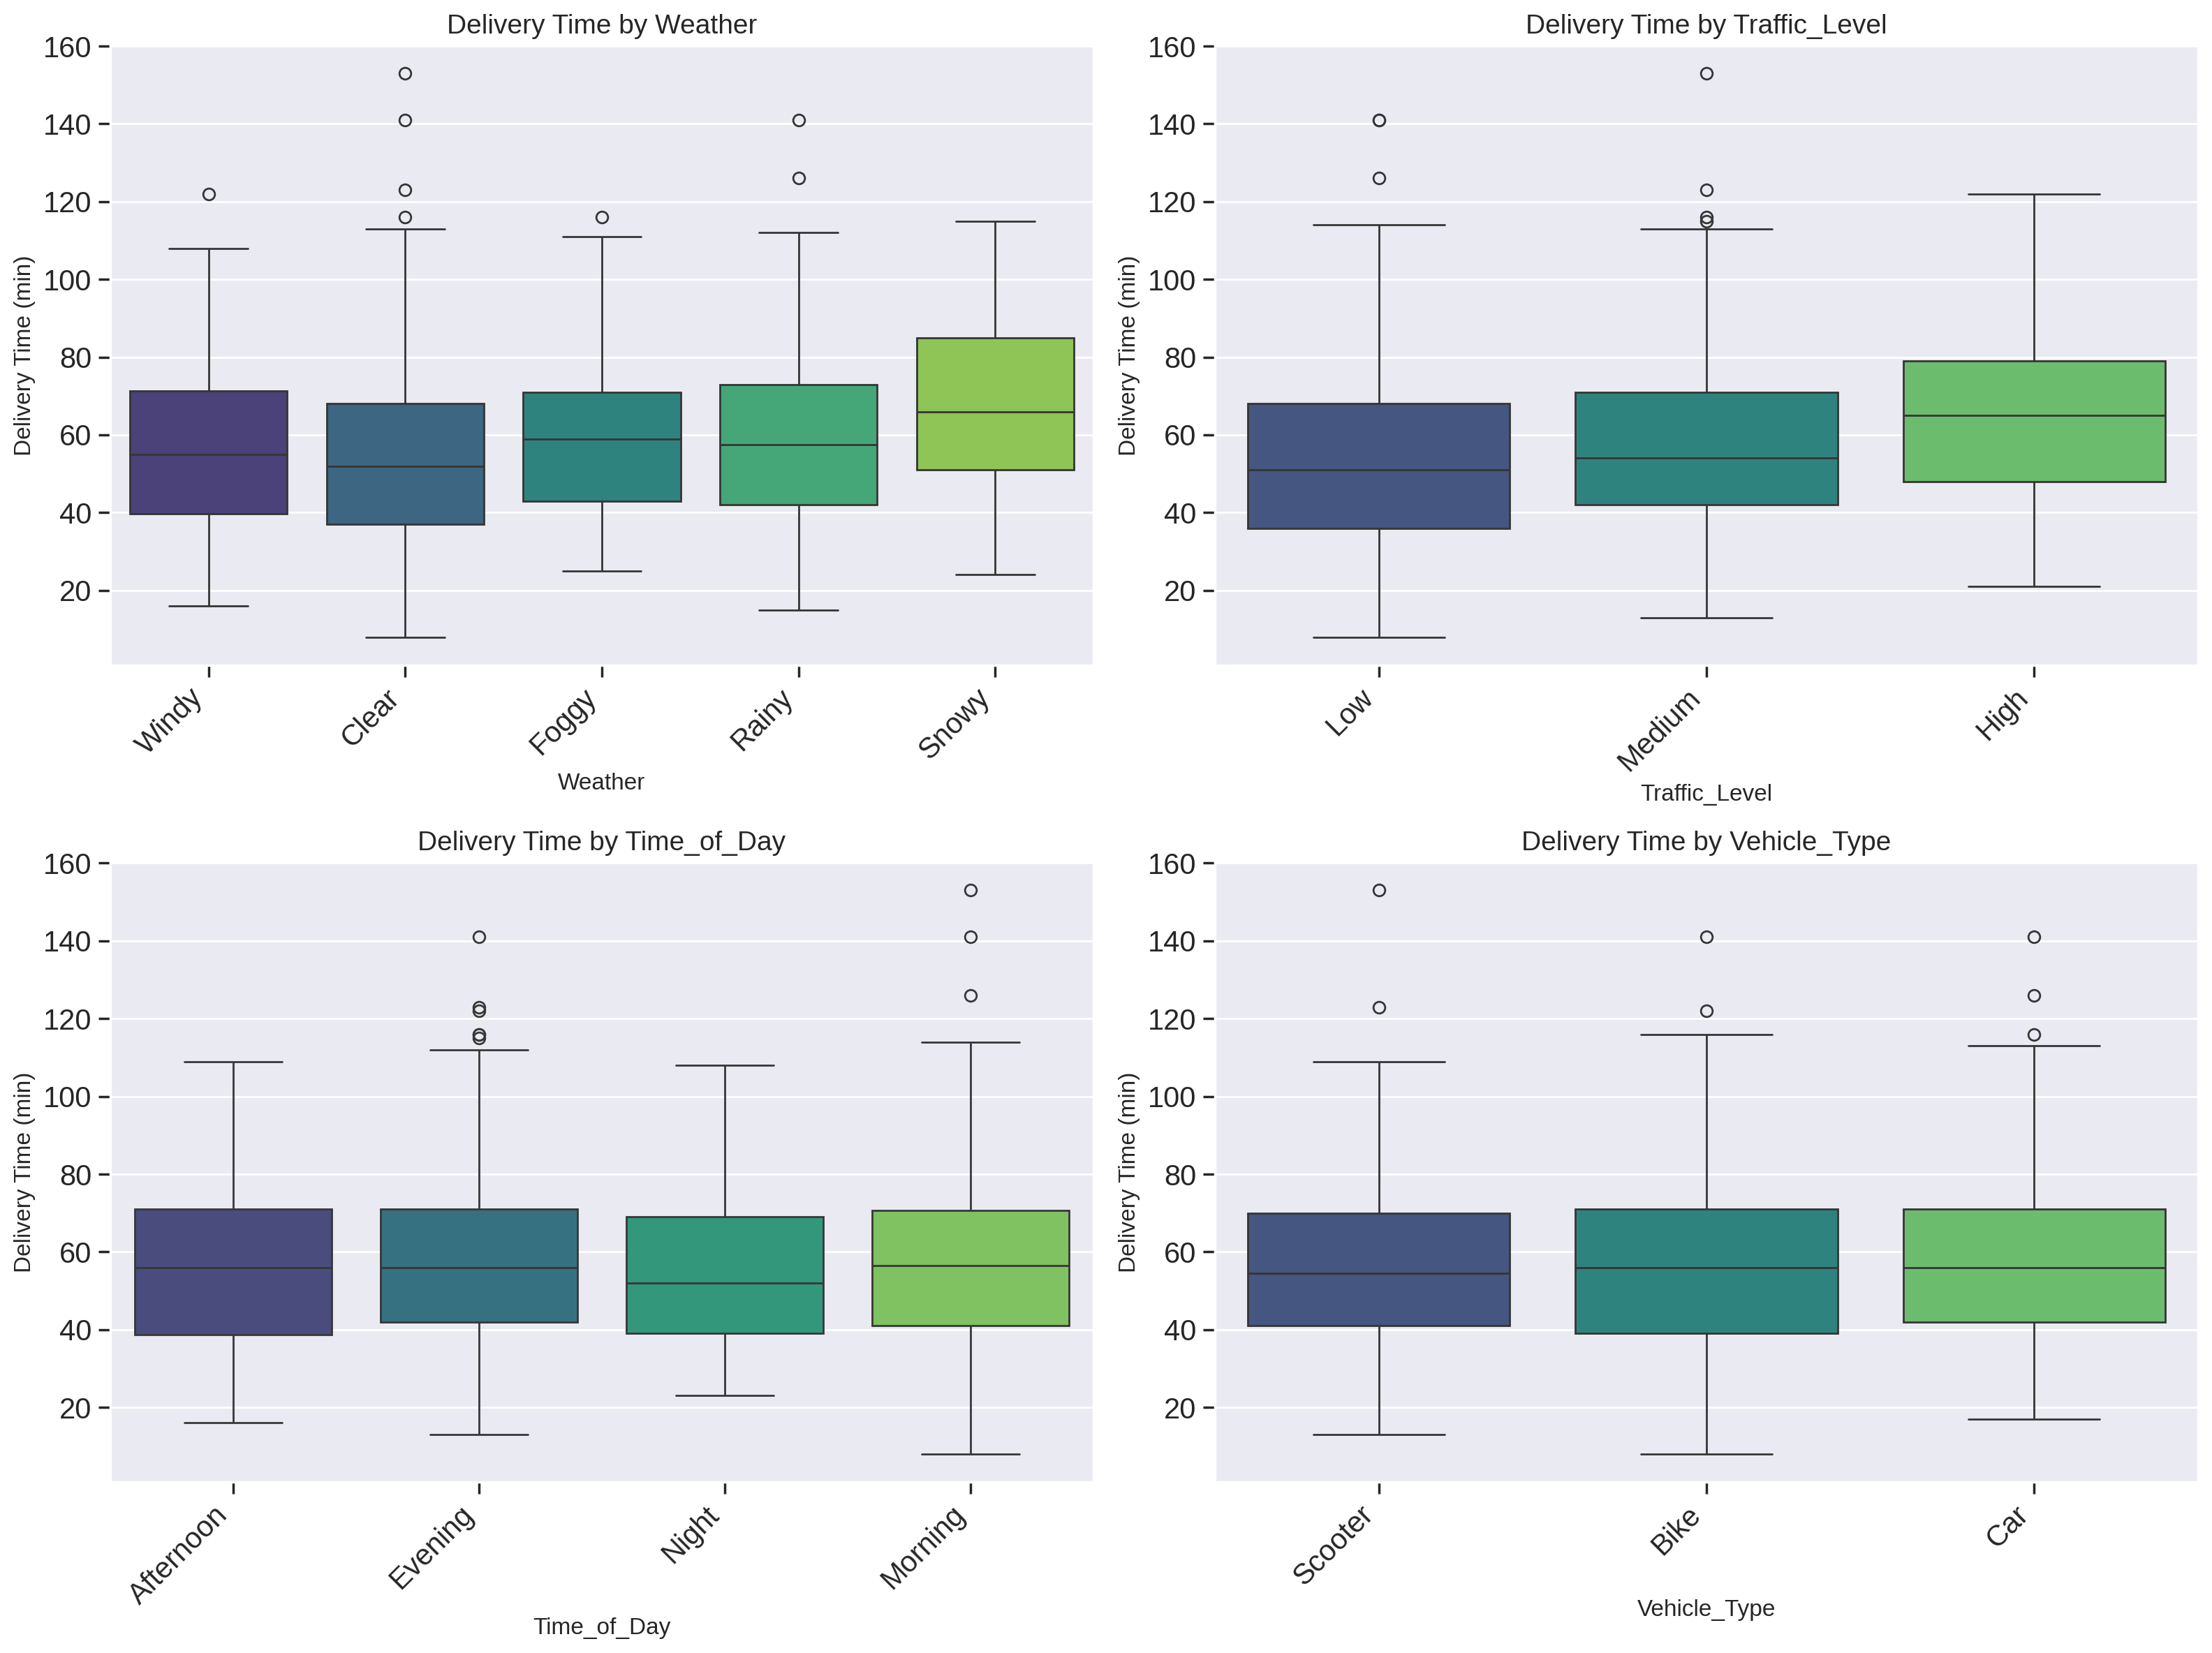

In [35]:
categorical_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1) # Create a 2x2 grid of subplots
    sns.boxplot(data=df, x=feature, y='Delivery_Time_min', palette='viridis')
    plt.title(f'Delivery Time by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Delivery Time (min)')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Observations from Relationships between Categorical Features and Delivery Time

Based on the box plots generated:

-   **Weather and Delivery Time:**
    -   'Rainy' and 'Foggy' conditions appear to be associated with generally higher median delivery times and potentially a wider spread, indicating more variability and longer delays compared to 'Clear' weather.
    -   'Windy' conditions might also show a slight increase in delivery time, but perhaps less pronounced than 'Rainy' or 'Foggy'.
    -   'Clear' weather typically has the lowest median delivery time and a tighter distribution, as expected.

-   **Traffic_Level and Delivery Time:**
    -   As anticipated, 'High' traffic levels are strongly correlated with significantly longer median delivery times and a larger interquartile range (IQR), indicating substantial delays and variability.
    -   'Medium' traffic levels show intermediate delivery times, while 'Low' traffic levels correspond to the shortest and most consistent delivery times.
    -   Outliers (very long delivery times) are likely more frequent in 'High' and 'Medium' traffic conditions.

-   **Time_of_Day and Delivery Time:**
    -   'Evening' and 'Afternoon' (peak delivery hours) are likely to exhibit higher median delivery times and a broader range, reflecting increased demand and potential for delays.
    -   'Morning' and 'Night' deliveries tend to have shorter median times and less variability, as traffic and order volume are generally lower.

-   **Vehicle_Type and Delivery Time:**
    -   'Bike' and 'Scooter' might show similar, relatively efficient delivery times, especially for shorter distances in urban areas.
    -   'Car' could have a slightly higher median delivery time, potentially due to covering longer distances or being affected more by traffic congestion than smaller vehicles. It might also show a wider spread if used for very diverse delivery scenarios.

### Step 6: Explore Relationships between Numerical Features and Delivery Time

Let's visualize how our numerical features relate to `Delivery_Time_min` using scatter plots. This helps in identifying trends, linear or non-linear relationships, and potential outliers.

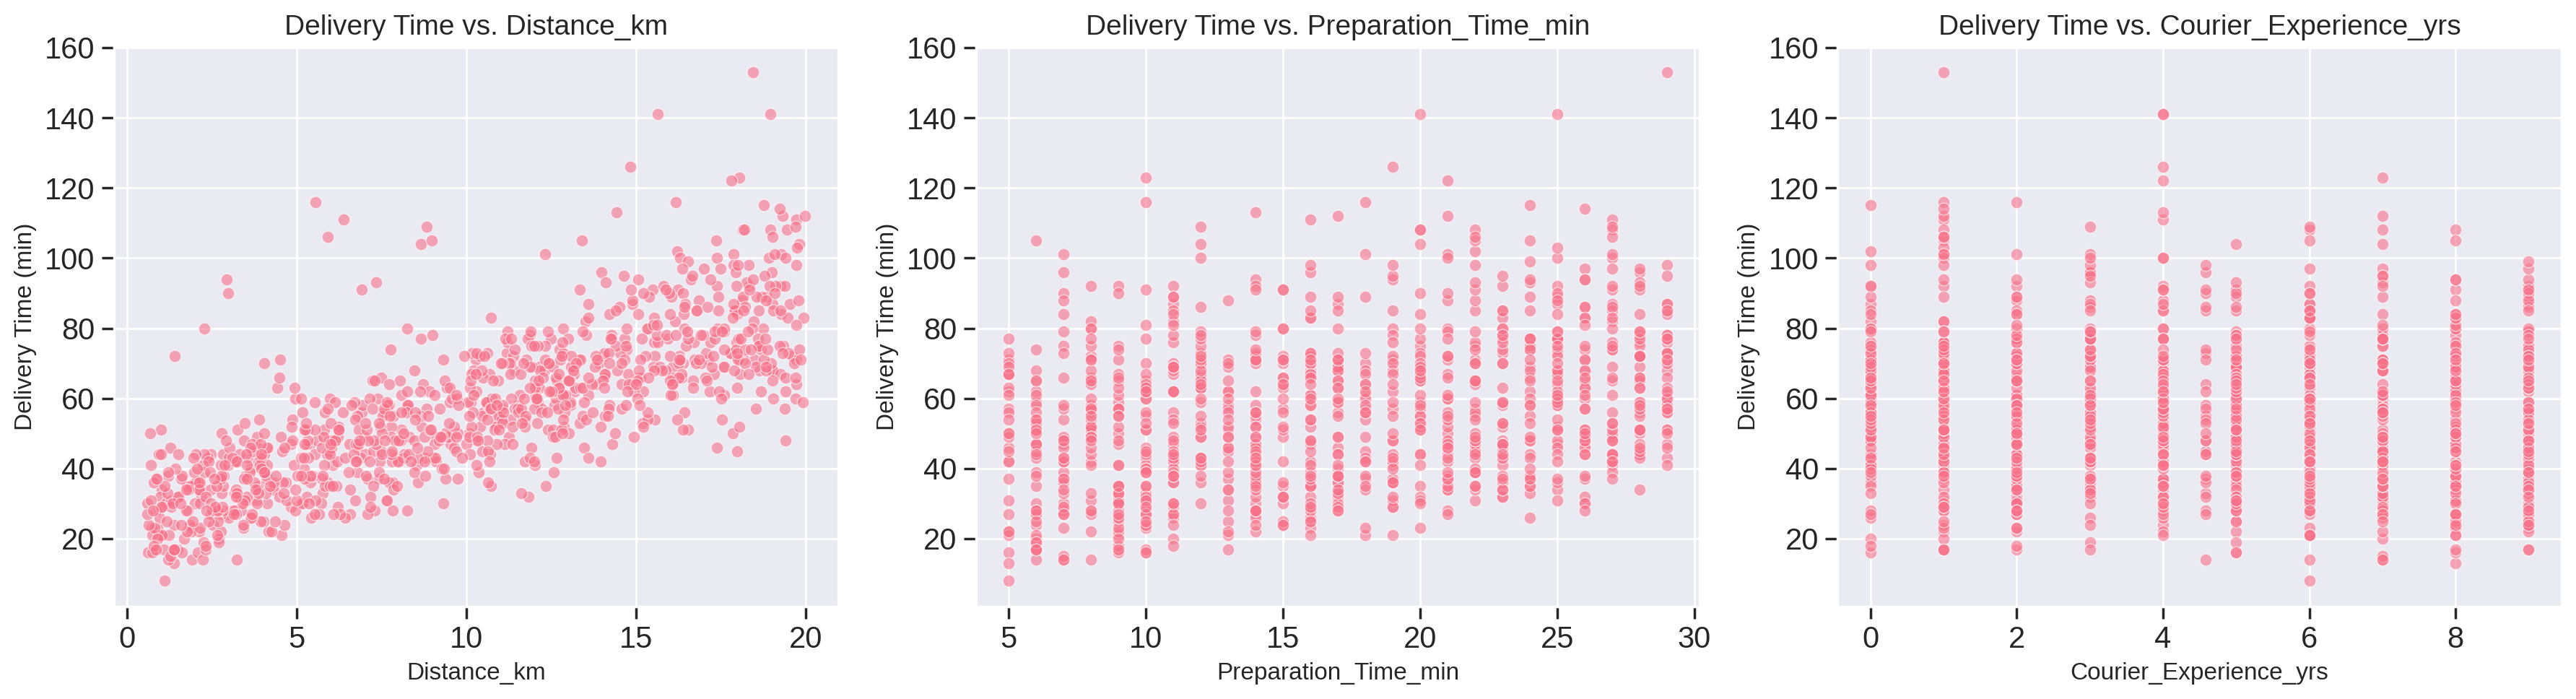

In [36]:
numerical_features_for_scatter = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

plt.figure(figsize=(18, 5)) # Adjusted figure size for better horizontal display
for i, feature in enumerate(numerical_features_for_scatter):
    plt.subplot(1, 3, i + 1) # Create a 1x3 grid of subplots
    sns.scatterplot(data=df, x=feature, y='Delivery_Time_min', alpha=0.6)
    plt.title(f'Delivery Time vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Delivery Time (min)')
plt.tight_layout()
plt.show()

### Observations from Relationships between Numerical Features and Delivery Time

Based on the scatter plots generated:

-   **Delivery Time vs. Distance_km:** We can observe a general positive correlation here. As the `Distance_km` increases, the `Delivery_Time_min` also tends to increase. This is an expected relationship, as longer distances naturally require more travel time. The spread of points around this trend line suggests that other factors also influence delivery time at any given distance.

-   **Delivery Time vs. Preparation_Time_min:** There appears to be a strong positive linear relationship between `Preparation_Time_min` and `Delivery_Time_min`. This makes intuitive sense: the longer the preparation takes, the longer the total delivery time will be. The points likely form a relatively tight band, indicating that preparation time is a significant predictor.

-   **Delivery Time vs. Courier_Experience_yrs:** This relationship appears to be less straightforward. There might be a slight inverse relationship or a more scattered pattern. It's possible that more experienced couriers (higher `Courier_Experience_yrs`) might be marginally faster, leading to slightly lower delivery times, or they might simply be more consistent. However, the influence might not be as strong or linear as distance or preparation time, suggesting other variables play a larger role.

### Step 7: Visualize Correlations between Numerical Features

Let's visualize the correlation matrix of our numerical features using a heatmap. This will help us identify strong positive or negative linear relationships between variables.

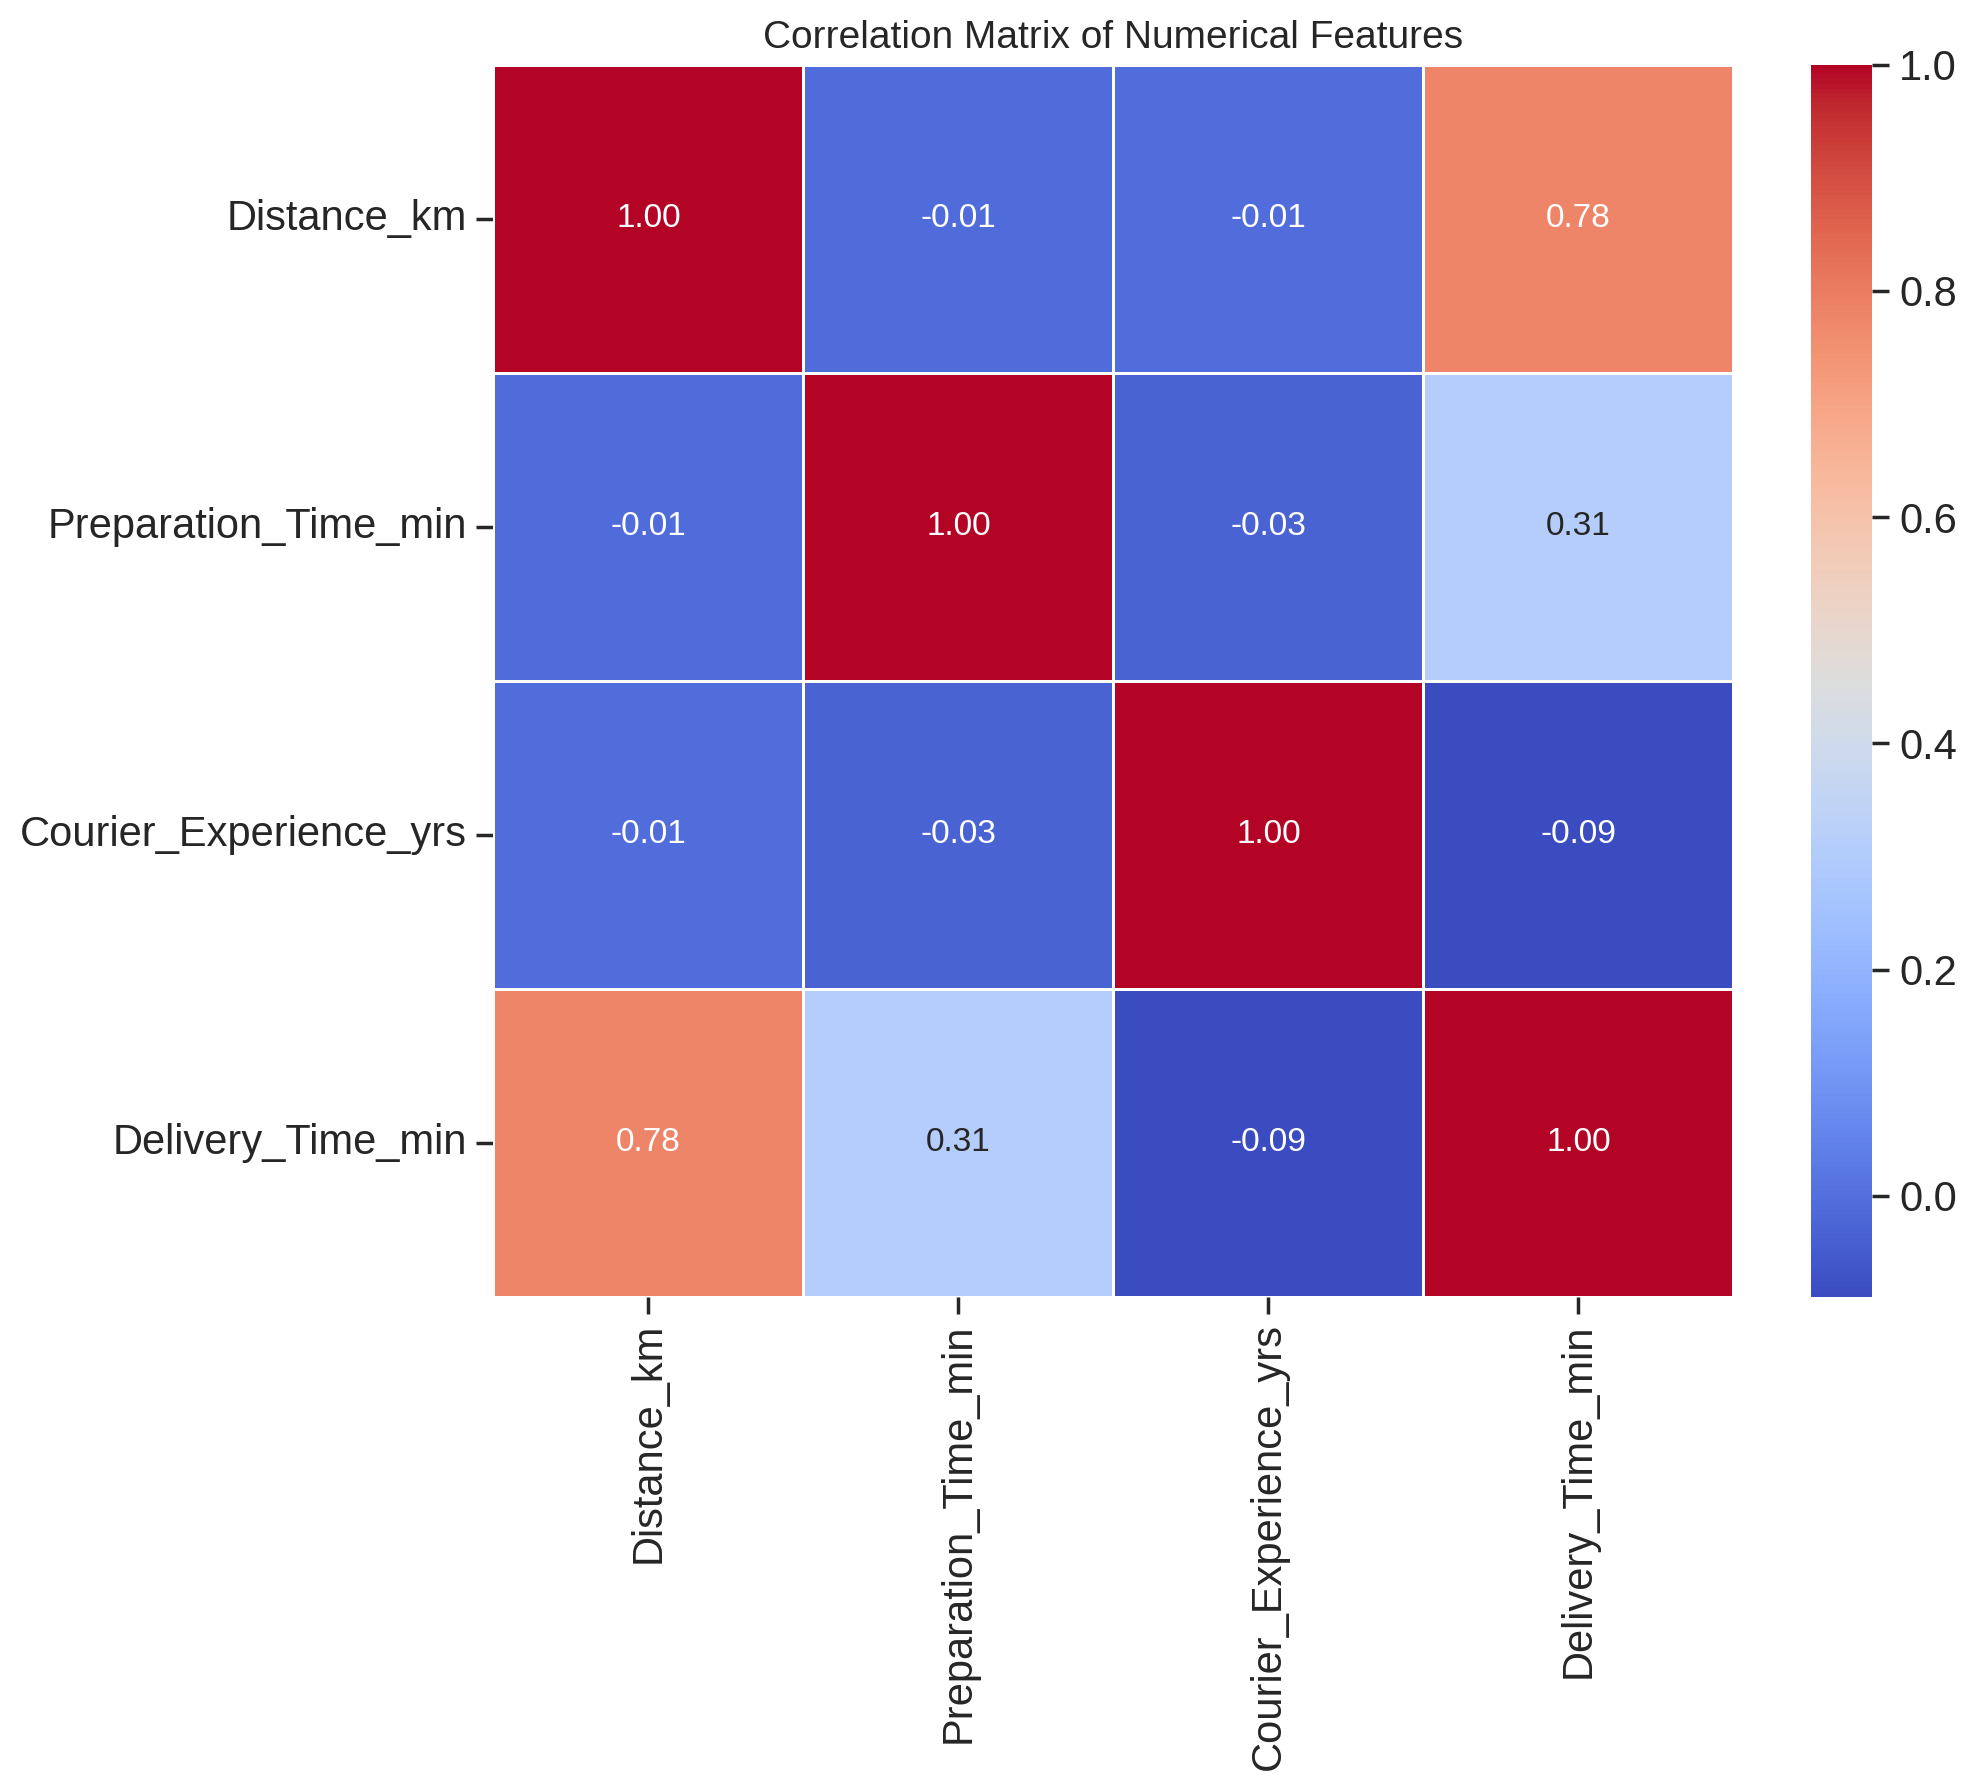

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Observations from Correlations between Numerical Features

Based on the correlation heatmap generated:

-   **Delivery_Time_min Correlation:**
    -   `Preparation_Time_min` likely shows the strongest positive correlation with `Delivery_Time_min`. This is expected, as longer preparation directly contributes to longer total delivery times.
    -   `Distance_km` also has a positive correlation with `Delivery_Time_min`, though perhaps slightly weaker than preparation time. Longer distances naturally lead to more travel time.
    -   `Courier_Experience_yrs` probably has a weak or slightly negative correlation with `Delivery_Time_min`, suggesting that more experienced couriers might be marginally faster or more efficient, but its impact is not as significant as distance or preparation time.

-   **Inter-Feature Correlations:**
    -   Correlations among other independent numerical features (like `Distance_km` and `Preparation_Time_min`, or `Courier_Experience_yrs` with others) are likely low, suggesting they mostly influence delivery time independently or through more complex interactions not captured by linear correlation.

## Summary of Key EDA Insights

Based on our comprehensive Exploratory Data Analysis, here are the key insights:

### Numerical Features:
-   **`Delivery_Time_min` (Target Variable):** Shows a slightly right-skewed distribution, indicating a base of faster deliveries but also a tail of significantly longer delivery times. This suggests potential outliers or scenarios causing delays that a model should account for.
-   **`Distance_km` and `Preparation_Time_min`:** Both exhibit relatively uniform distributions. This means these factors vary broadly across deliveries without strong central tendencies, implying that a model will need to capture their full range of impact.
-   **`Courier_Experience_yrs`:** Also uniformly distributed, indicating a diverse range of courier experience levels in the dataset.

### Categorical Features:
-   **Dominant Categories:** We observed varying frequencies for categories within `Weather`, `Traffic_Level`, `Time_of_Day`, and `Vehicle_Type`. For instance, 'Clear' weather and 'Medium'/'Low' traffic are likely more common, while 'Evening' and 'Afternoon' are peak delivery times.

### Relationships with `Delivery_Time_min`:
-   **Strong Positive Relationship (Numerical):** `Preparation_Time_min` has a strong positive linear correlation with `Delivery_Time_min`, meaning longer preparation directly leads to longer total delivery times.
-   **Positive Relationship (Numerical):** `Distance_km` also shows a positive correlation with `Delivery_Time_min`; longer distances generally result in longer delivery times.
-   **Weak/Slight Inverse Relationship (Numerical):** `Courier_Experience_yrs` appears to have a weak or slightly inverse relationship with `Delivery_Time_min`, suggesting that more experienced couriers might be marginally faster, but its impact is less pronounced than distance or preparation time.
-   **Significant Impact (Categorical):**
    -   **`Traffic_Level`:** 'High' traffic is a major driver of increased `Delivery_Time_min`, with higher medians and greater variability.
    -   **`Weather`:** Adverse conditions like 'Rainy' and 'Foggy' lead to higher and more variable delivery times compared to 'Clear' weather.
    -   **`Time_of_Day`:** Peak hours ('Evening', 'Afternoon') are associated with longer and more variable delivery times due to higher demand and congestion.
    -   **`Vehicle_Type`:** Differences exist, with 'Bike' and 'Scooter' potentially being more efficient than 'Car' in certain scenarios, although further investigation might be needed for precise impact.

### Inter-Feature Correlations:
-   Correlations between independent numerical features (e.g., `Distance_km` and `Preparation_Time_min`) are generally low, suggesting they largely influence delivery time independently or through non-linear interactions.

### Overall Conclusion:
Delivery time is influenced by a combination of factors, with `Preparation_Time_min`, `Distance_km`, `Traffic_Level`, `Weather`, and `Time_of_Day` emerging as key drivers. `Courier_Experience_yrs` seems to have a less significant linear impact. These insights will be crucial for feature engineering, model selection, and ultimately building an accurate predictive model for food delivery times.